# K_Mean Clustering

### What is K-Means Clustering?
- K-Means is an unsupervised learning algorithm used for clustering — grouping similar data points into K non-overlapping clusters based on feature similarity.
- K-mean clustering is an unsupervised learning algorithm, which groups the unlabeled dataset into dofferent clusters.
- K defines the number of pre-defined clusters that need to be created in the process.

- 🧠 Goal: Minimize the distance between points and the center of their cluster.

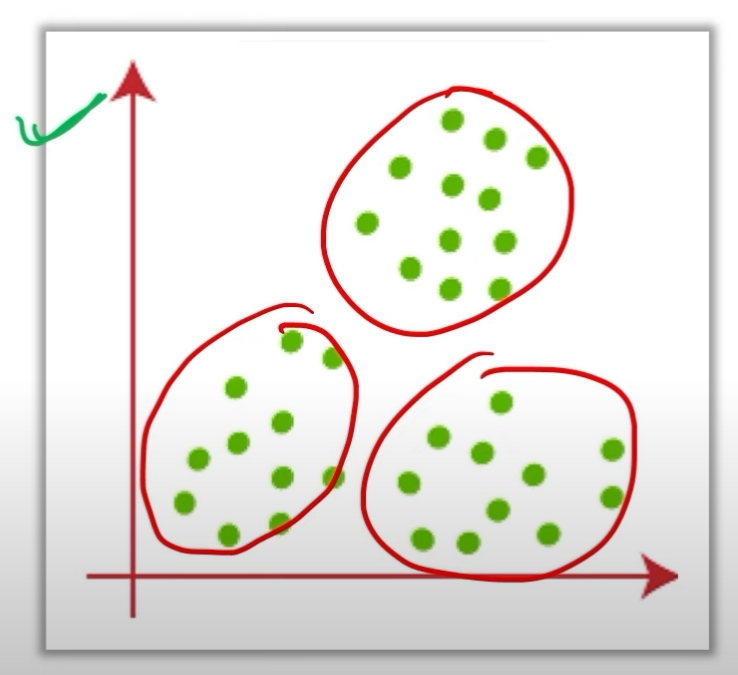

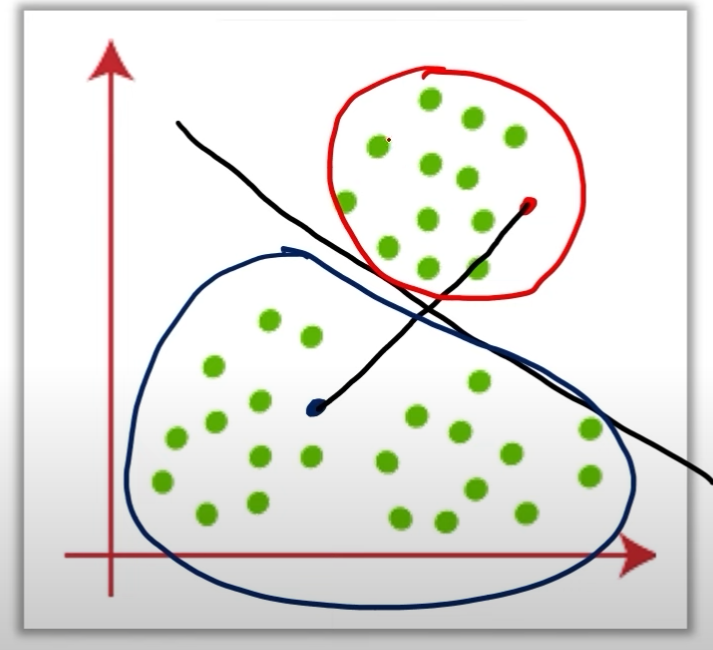

Steps:
- 1. takes random center point
- 2. creates groups based on the center point
- 3. find nearest point (using mean) and move the point to the best center point.

Note: the number of groups are K in the algorithm and we decide it with the help of Elbow method to get the best groups and no of groups.

###  Intuition Behind K-Means
- You choose K (number of clusters).
- The algorithm tries to group data points into these K groups.
- Each group (cluster) has a centroid (center point).
- Points are assigned to the nearest centroid.
- Centroids are recalculated repeatedly until convergence.

### Steps of the K-Means Algorithm
Initialization:
- Choose the number of clusters K.
- Randomly initialize K centroids.

Assignment:
- Assign each data point to the closest centroid using Euclidean distance.

Update:
- Recalculate the centroid of each cluster as the mean of the points assigned to it.

Repeat:
- Iterate Assignment → Update until:
- Centroids don’t change (convergence), or
- Maximum iterations reached.

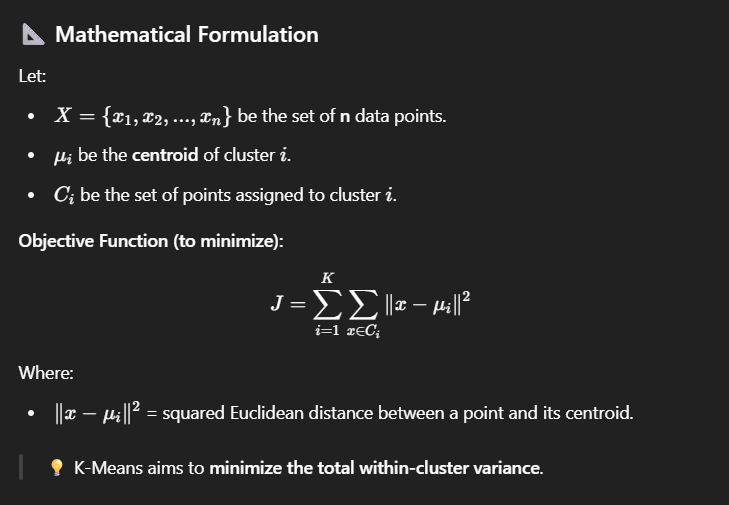

## Elbow Method

- The Elbow method is one of the most popular ways to find the optimal number of clusters.
- This method uses the concept of WCSS value. WCSS stands for within cluster sum of squares, which defines the total variations within a cluster.

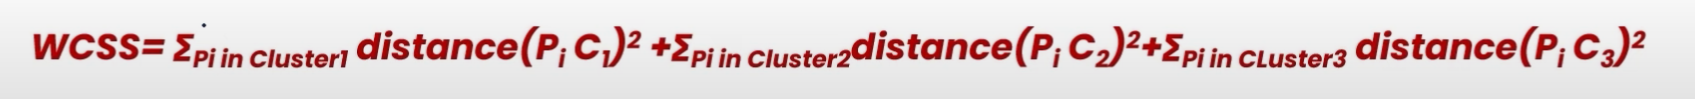

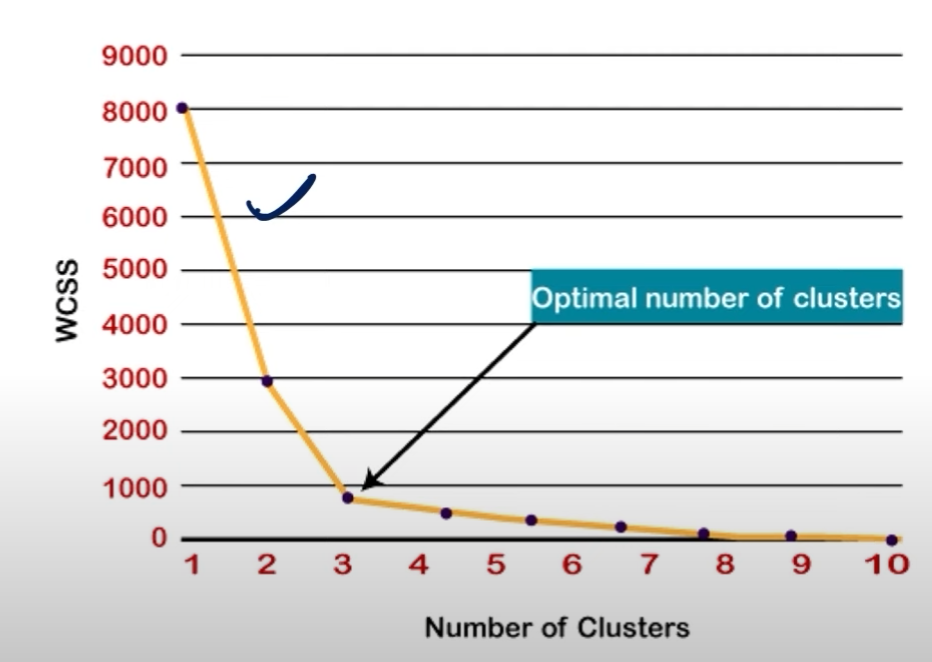

- the Elbow point is the no of clusters
- K-Mean++ is used to help for getting the best clusters when the gab between the clusters is too less or the clusters are too close then it help to keep the points distance more and keep then away.

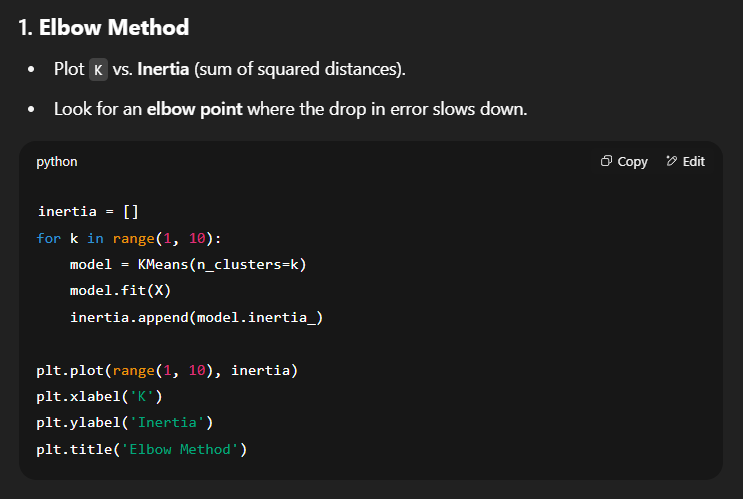

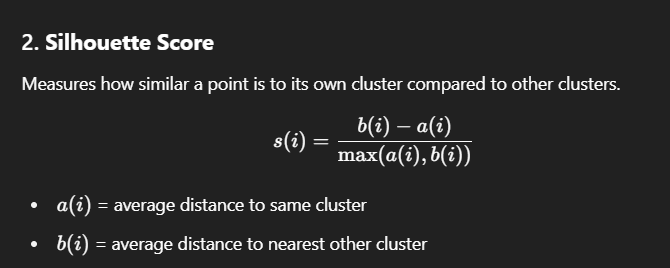

# Implementation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
ds = pd.read_csv('iris-dataset.csv')
ds.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


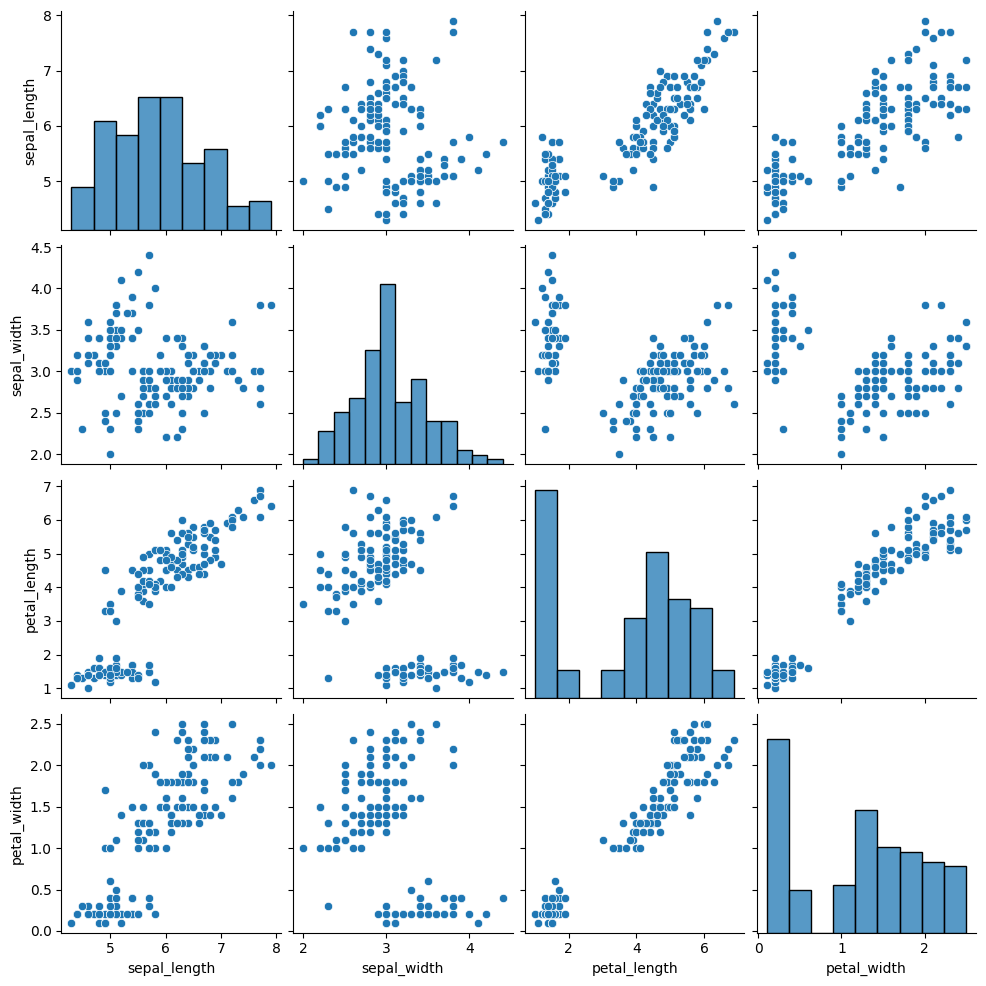

In [27]:
sns.pairplot(data= ds)
plt.show()

In [28]:
from sklearn.cluster import KMeans

In [29]:
wcss = []

for i in range(2, 21):
    km = KMeans(n_clusters= i, init= 'k-means++')
    km.fit(ds)
    wcss.append(km.inertia_)

In [30]:
wcss

[152.36870647733906,
 143.4537354840621,
 57.47327326549491,
 50.08800813423576,
 42.32651111111112,
 34.647725442834144,
 30.42614155888183,
 28.65320920745921,
 27.812101981351976,
 25.46927238770002,
 23.968666457811196,
 23.303437229437233,
 21.592916625041624,
 20.397582792207793,
 19.794816643323998,
 17.936935378347147,
 16.344341991341988,
 16.107745411322426,
 17.792467282717286]

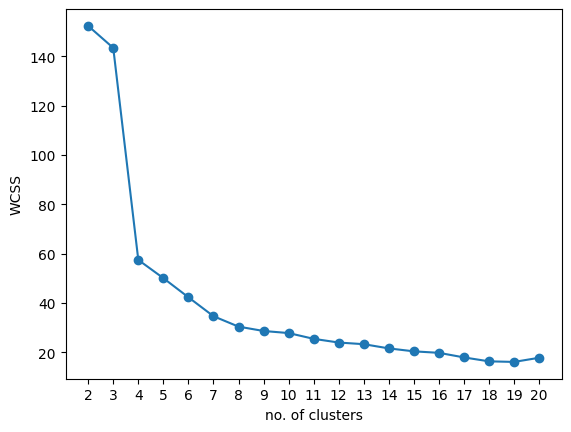

In [31]:
plt.plot([i for i in range(2, 21)], wcss, marker= "o")
plt.xlabel('no. of clusters')
plt.xticks([i for i in range(2, 21)])
plt.ylabel('WCSS')
plt.show()  # here we can see the best no of cluster is 3 as after that its going down

In [35]:
kmn = KMeans(n_clusters=3)
kmn.fit_predict(ds)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [36]:
ds['predict'] = kmn.fit_predict(ds)

In [37]:
ds

,sepal_length,sepal_width,petal_length,petal_width,predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


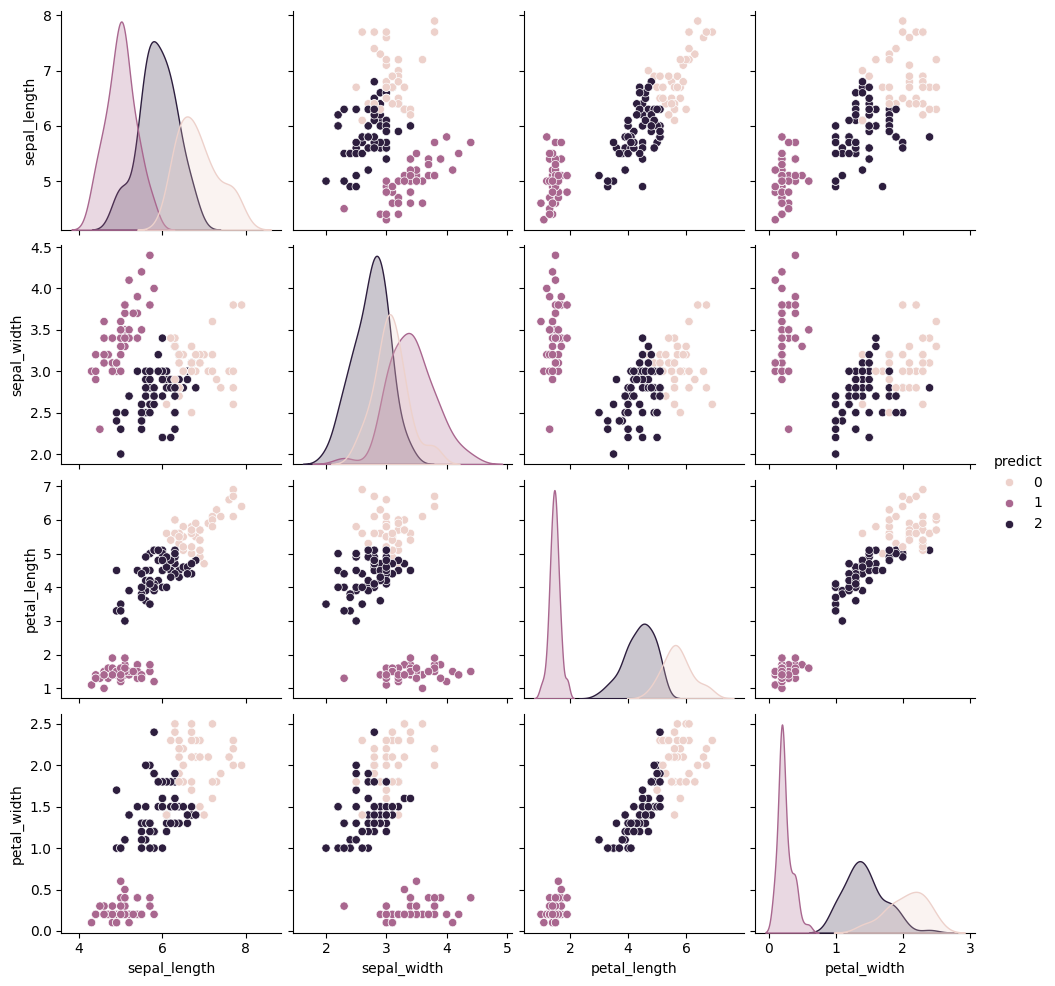

In [38]:
sns.pairplot(data= ds, hue= 'predict')
plt.show()